In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pymongo
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

myclient = pymongo.MongoClient("mongodb://localhost:27017/") #MongoClient Server address
mydb = myclient["iris-data"]
mycol = mydb["Iris"]
data = pd.DataFrame(list(mycol.find()))

In [3]:
data.head()

,_id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,_id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

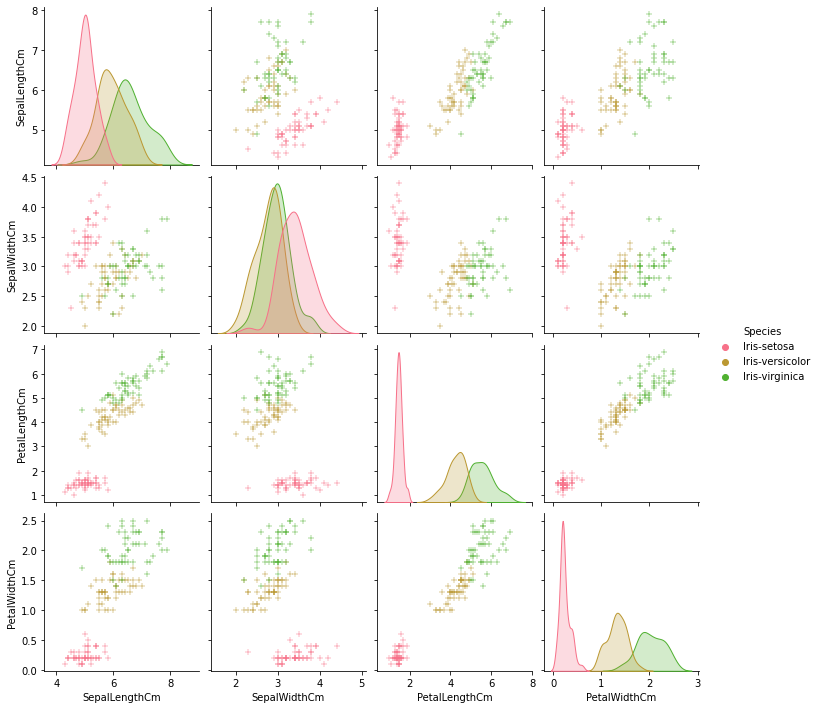

In [7]:
tmp = data.drop('_id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [8]:
X = data.drop(['_id', 'Species'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("LogisticRegression Model Accuracy : ", metrics.accuracy_score(y_test, y_pred))

LogisticRegression Model Accuracy :  0.9833333333333333


In [10]:
import random
tdn=random.choice(X_test.index)
print("Test Data Index:",tdn)
print("Species : "+y_test.loc[tdn])
print(X_test.loc[tdn])
print()
print("LogisticRegression")
if logreg.predict([X_test.loc[tdn]]) == y_test[tdn]:
    print("Predicted Label : "+ (logreg.predict([X_test.loc[tdn]]).item()))
    print("   Actual Label : "+  y_test[tdn] )
    print("Classified Correctly")
else:
    print("Predicted Label :"+ (logreg.predict([X_test.loc[tdn]]).item()))
    print("   Actual Label :"+  y_test[tdn] )
    print("Mis-Classified")

Test Data Index: 69
Species : Iris-versicolor
SepalLengthCm    5.6
SepalWidthCm     2.5
PetalLengthCm    3.9
PetalWidthCm     1.1
Name: 69, dtype: float64

LogisticRegression
Predicted Label : Iris-versicolor
   Actual Label : Iris-versicolor
Classified Correctly
